In [1]:
#dependences
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:

# Define the path to the CSV file
df_csv = "uk_gov_data_sparse_preproc.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(df_csv, encoding="ISO-8859-1")

# Create a copy of the DataFrame
df_1 = df.copy()

# Display the first 4 rows of the DataFrame
df_1.head(4)

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
0,1.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,161.0
1,2.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,153.0
2,3.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
3,4.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0


In [3]:
# Many null values, we need to investigate
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6756 non-null   float64
 1   manufacturer          6756 non-null   object 
 2   model                 6756 non-null   object 
 3   description           6756 non-null   object 
 4   transmission          6609 non-null   object 
 5   transmission_type     6756 non-null   object 
 6   engine_size_cm3       6755 non-null   float64
 7   fuel                  6756 non-null   object 
 8   powertrain            6756 non-null   object 
 9   power_ps              6712 non-null   float64
 10  co2_emissions_gPERkm  6756 non-null   float64
dtypes: float64(4), object(7)
memory usage: 580.7+ KB


In [4]:
# look at missing value
df_1.isnull().sum()

car_id                    0
manufacturer              0
model                     0
description               0
transmission            147
transmission_type         0
engine_size_cm3           1
fuel                      0
powertrain                0
power_ps                 44
co2_emissions_gPERkm      0
dtype: int64

In [5]:
# look at duplcated value
df_1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6751    False
6752    False
6753    False
6754    False
6755    False
Length: 6756, dtype: bool

In [6]:
df_1.describe()

,car_id,engine_size_cm3,power_ps,co2_emissions_gPERkm
count,6756.000000,6755.000000,6712.000000,6756.000000
mean,3378.500000,1793.553516,185.494636,154.775607
std,1950.433542,825.695652,109.098685,54.972233
min,1.000000,0.000000,0.000000,0.000000
25%,1689.750000,1333.000000,120.000000,131.000000
50%,3378.500000,1749.000000,150.000000,151.000000
75%,5067.250000,1996.000000,218.000000,179.250000
max,6756.000000,6749.000000,800.000000,380.000000


In [7]:
##Question 1: What is the effect of fuel type on CO2 emissions (g/km)?

In [8]:
##Question 2: What is the effect of vehicle power (PS) on CO2 emissions (g/km)?

In [9]:
##Question 3: Do CO2 emissions vary significantly according to the type of transmission in vehicles? 

In [10]:
#Isbelis

In [11]:
# Using t-tets

In [12]:
## Descriptive data 

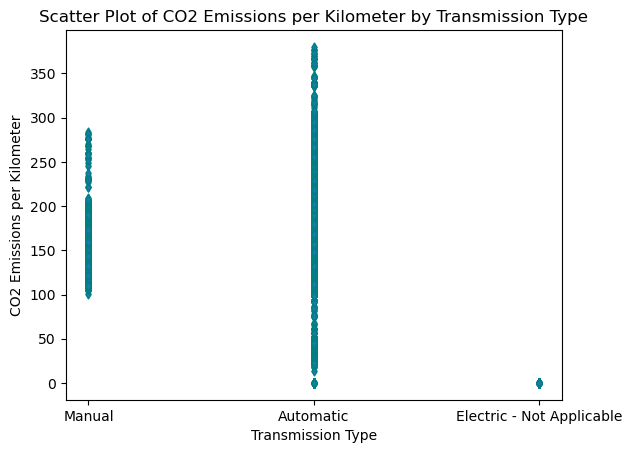

In [13]:
# Create a scatter plot
df_1.plot.scatter(x='transmission_type', y='co2_emissions_gPERkm', marker="d", facecolors="E9C46A", edgecolors="teal")

# Set plot labels and title
plt.xlabel('Transmission Type')
plt.ylabel('CO2 Emissions per Kilometer')
plt.title('Scatter Plot of CO2 Emissions per Kilometer by Transmission Type')

# Display the plot
plt.show()

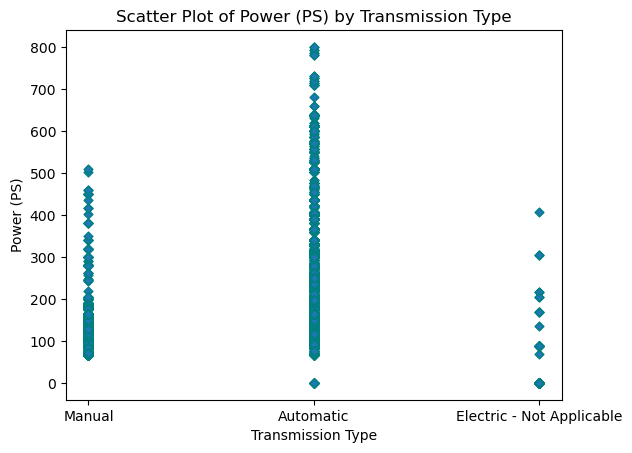

In [14]:

# Create a scatter plot
df_1.plot.scatter(x='transmission_type', y='power_ps', marker="D", facecolors="E9C46A", edgecolors="teal")

# Set plot labels and title
plt.xlabel('Transmission Type')
plt.ylabel('Power (PS)')
plt.title('Scatter Plot of Power (PS) by Transmission Type')

# Display the plot
plt.show()

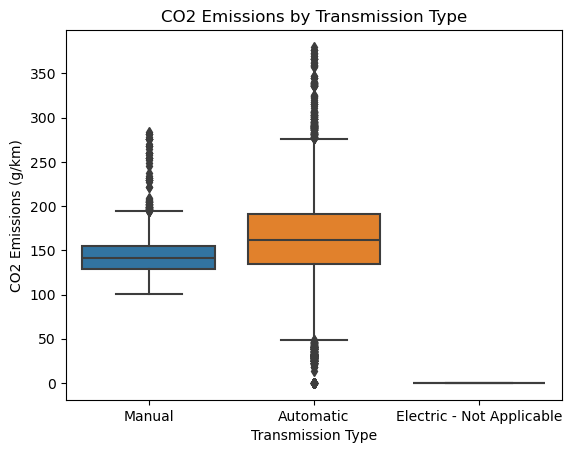

In [15]:
sns.boxplot(x='transmission_type', y='co2_emissions_gPERkm', data=df_1)
plt.title('CO2 Emissions by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

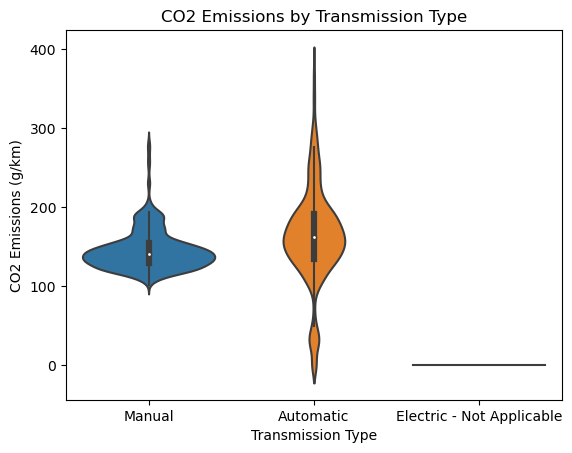

In [16]:
sns.violinplot(x='transmission_type', y='co2_emissions_gPERkm', data=df_1)
plt.title('CO2 Emissions by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

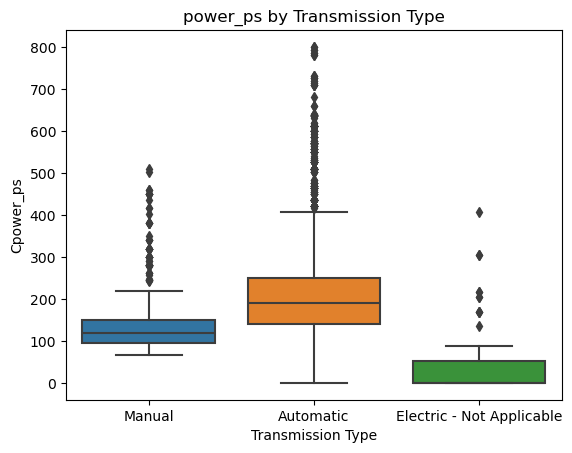

In [17]:
sns.boxplot(x='transmission_type', y='power_ps', data=df_1)
plt.title('power_ps by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Cpower_ps')
plt.show()

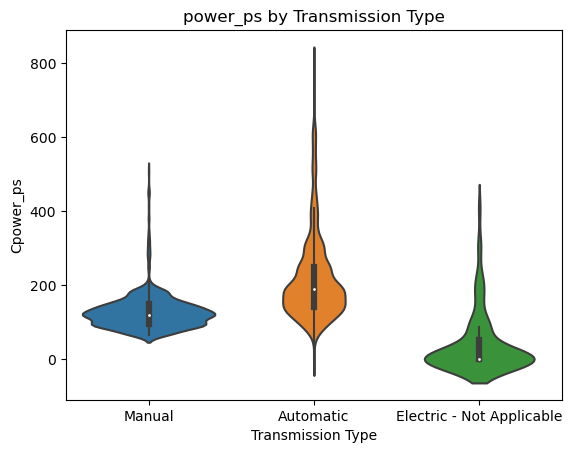

In [19]:
sns.violinplot(x='transmission_type', y='power_ps', data=df_1)
plt.title('power_ps by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Cpower_ps')
plt.show()

In [18]:
##Question 4: What is the effect of engine size (cm^3) on CO2 emissions (g/km)?
# William